# 🚢 Desafio Pandas - Analisando o Titanic

Neste projeto, você será um **cientista de dados** e irá explorar um conjunto de dados real do Titanic.
O objetivo é responder a perguntas importantes sobre os passageiros e encontrar padrões interessantes.

---
### 🔍 Como funciona?
- O conjunto de dados já está carregado para você.
- Leia as instruções e tente responder a cada desafio explorando os dados.
- Não se preocupe se não lembrar todos os comandos exatos! Consulte suas anotações e o material de referência.
- O objetivo é **pensar e testar hipóteses** sobre os passageiros do Titanic.

Boa sorte! 🚀


# Dicionário de dados — `titanic` (Seaborn)

| Coluna        | Tipo        | Descrição                                                                                   |
|---------------|-------------|---------------------------------------------------------------------------------------------|
| `survived`    | int (0/1)   | Sobreviveu ao naufrágio (1 = sim, 0 = não).                                                |
| `pclass`      | int (1–3)   | Classe do bilhete: 1 = 1ª, 2 = 2ª, 3 = 3ª classe.                                          |
| `sex`         | categoria   | Sexo do passageiro(a) (`male`, `female`).                                                   |
| `age`         | float       | Idade em anos (pode ter valores ausentes).                                                  |
| `sibsp`       | int         | Nº de **irmãos/cônjuges** a bordo.                                                          |
| `parch`       | int         | Nº de **pais/filhos** a bordo.                                                              |
| `fare`        | float       | Tarifa paga pelo bilhete.                                                                    |
| `embarked`    | categoria   | Porto de embarque (`C` = Cherbourg, `Q` = Queenstown, `S` = Southampton).                   |
| `class`       | categoria   | Classe em texto (`First`, `Second`, `Third`); derivada de `pclass`.                         |
| `who`         | categoria   | Tipo de pessoa (`man`, `woman`, `child`), inferido de `sex` e `age`.                        |
| `adult_male`  | bool        | Indica se é **homem adulto** (masculino e idade ≥ 18, quando conhecido).                    |
| `deck`        | categoria   | Convés da cabine (`A`–`G`, `T`), frequentemente ausente (muitos `NaN`).                     |
| `embark_town` | categoria   | Cidade do porto de embarque (`Cherbourg`, `Queenstown`, `Southampton`).                      |
| `alive`       | categoria   | Status de sobrevivência em texto (`yes`/`no`); redundante com `survived`.                   |
| `alone`       | bool        | `True` se **não** viajava com família (i.e., `sibsp + parch == 0`).                          |

**Notas:**
- Colunas com muitos ausentes: `age`, `deck`, às vezes `embarked`.
- `class`, `who`, `adult_male`, `alive` e `alone` são colunas derivadas/convenientes para análise.


In [1]:
import pandas as pd
import seaborn as sns

# Carregar dataset do Titanic
df = sns.load_dataset("titanic")

# Exibir as primeiras linhas para se familiarizar com os dados
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## 📝 Desafio 1: Explore os dados

1. **Quais informações gerais podemos obter sobre os dados?**  
   - Qual o tamanho do dataset?  
   - Quais colunas estão disponíveis?  
   - Que tipo de dados cada coluna contém?  

2. **Quais são as principais estatísticas descritivas desse conjunto de dados?**  
   - Qual a média de idade dos passageiros?  
   - Qual o preço médio pago pela passagem?


In [2]:
# Solução
print(df.shape)  # Número de linhas e colunas
df.info()  # Informações gerais

(891, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [3]:
df.describe()  # Estatísticas descritivas

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
df['age'].mean(), df['fare'].mean()  # Média de idade e tarifa

(29.69911764705882, 32.204207968574636)

## 📝 Desafio 2: Quem eram os passageiros do Titanic?

1. **Havia mais homens ou mulheres a bordo?**  
2. **Qual era a distribuição de passageiros por classe?**  
3. **A maioria dos passageiros sobreviveu ou não?**  


In [5]:
# df['age'].value_counts()

In [6]:
# Solução
df['sex'].value_counts()  # Contagem de homens e mulheres

sex
male      577
female    314
Name: count, dtype: int64

In [7]:
df['class'].value_counts()  # Número de passageiros por classe

class
Third     491
First     216
Second    184
Name: count, dtype: int64

In [8]:
df['survived'].value_counts()  # Quantos sobreviveram e quantos não sobreviveram

survived
0    549
1    342
Name: count, dtype: int64

## 📝 Desafio 3: Quem eram os passageiros mais ricos? 💰

1. **Liste os passageiros que pagaram mais de 250 pela passagem.**  
2. **Quantos desses passageiros estavam na primeira classe?**  
3. **Quantos deles sobreviveram?**  


In [9]:
# Solução
ricos = df[df['fare'] > 250]

In [10]:
len(df[ (df['fare'] > 250) & (df['class'] == 'First') ])

9

In [11]:
ricos['class'].value_counts()  # Contagem por classe

class
First     9
Second    0
Third     0
Name: count, dtype: int64

In [12]:
ricos['survived'].value_counts()  # Contagem de sobreviventes

survived
1    7
0    2
Name: count, dtype: int64

## 📝 Desafio 4: Existe relação entre idade e classe dos passageiros?

1. **Qual era a idade média dos passageiros em cada classe?**  
2. **Os passageiros da terceira classe eram mais jovens que os da primeira?**  


In [13]:
# 1. Lembrar do comando de fazer agrupamento: groupby
# 2. Como usar o groupby: df.groupby
# 3. Passar coluna de agrupamento com os parenteses
# 4. Passar a coluna de critério entre colchetes
# 5. Passar por último o critério a ser utilizado

array([[<Axes: title={'center': 'age'}>]], dtype=object)

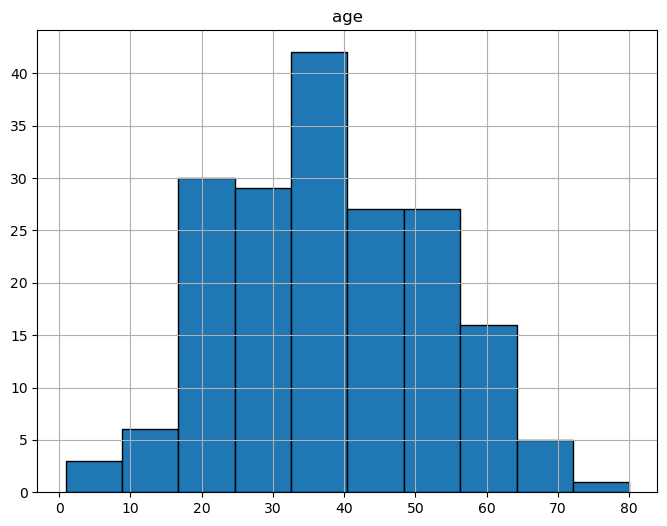

In [14]:
# sub_df = df[ df['class'] == 'First' ]
# sub_df.hist('age', ec='black')

df[df['class'] == 'First'].hist('age', ec='black', bins=10, figsize=(8,6))

In [15]:
# df.hist('age', ec='black')

In [16]:
df.groupby('class')['age'].mean()

/tmp/ipykernel_94629/1219636443.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('class')['age'].mean()


class
First     38.233441
Second    29.877630
Third     25.140620
Name: age, dtype: float64

## 📝 Desafio 5: Sobrevivência no Titanic 🚑

1. **Quem teve maior chance de sobrevivência?**  
   - Homens ou mulheres?  
   - Passageiros da primeira ou da terceira classe?  


In [17]:
# dataframe, groupby, coluna 'sex', 'survived', 'mean'

In [18]:
# 1.1
df.groupby('sex')['survived'].mean()

sex
female    0.742038
male      0.188908
Name: survived, dtype: float64

In [19]:
# 1.2
df.groupby('class')['survived'].mean()

/tmp/ipykernel_94629/2161215390.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('class')['survived'].mean()


class
First     0.629630
Second    0.472826
Third     0.242363
Name: survived, dtype: float64

Maior chance de sobrevivência de passageiros da 1ª classe

## 📝 Desafio 6: Passageiros sozinhos tiveram menos chances de sobreviver?

1. **Crie uma nova coluna chamada 'viajou_sozinho'**  
   - Considere que uma pessoa estava sozinha se `sibsp == 0` e `parch == 0`.  
2. **Compare a taxa de sobrevivência entre passageiros que viajaram sozinhos e os que estavam acompanhados.**  


In [20]:
# df['viajou_sozinho'] = df['sibsp'] + df['parch']
# df['viajou_sozinho'] = df['viajou_sozinho'].apply(lambda x: 1 if x == 0 else 0)

# 6.1
df['viajou_sozinho'] = (df['sibsp'] == 0) & (df['parch'] == 0)
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,viajou_sozinho
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,True


In [21]:
# 6.2
df.groupby('viajou_sozinho')['survived'].mean()

viajou_sozinho
False    0.505650
True     0.303538
Name: survived, dtype: float64

## 📝 Desafio 7: O ponto de embarque influenciava o preço da passagem?

1. **Qual era o preço máximo das passagens em cada ponto de embarque (`embark_town`)?**  
2. **Os passageiros que embarcaram em um lugar específico pagaram mais do que os outros?**  


In [22]:
# 7.1
df.groupby('embark_town')['fare'].max()

embark_town
Cherbourg      512.3292
Queenstown      90.0000
Southampton    263.0000
Name: fare, dtype: float64

In [23]:
# 7.2
df.groupby('embark_town')['fare'].mean()

embark_town
Cherbourg      59.954144
Queenstown     13.276030
Southampton    27.079812
Name: fare, dtype: float64

In [24]:
# df[df['embark_town'] == 'Cherbourg']['class'].value_counts()

## 📝 Desafio 8: Como eram as famílias dos passageiros? 👨‍👩‍👧‍👦

1. **Crie uma nova coluna chamada 'tamanho_familia'**, que seja a soma de `sibsp` e `parch`.  
2. **Qual era o tamanho médio das famílias?**  
3. **Havia relação entre tamanho da família e sobrevivência?**  


In [25]:
df['tamanho_familia'] = df['sibsp'] + df['parch'] + 1 # incluindo o próprio passageiro
df.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,viajou_sozinho,tamanho_familia
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,False,2
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,False,2
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,True,1
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,False,2
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,True,1
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True,True,1
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True,True,1
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False,False,5
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False,False,3
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False,False,2


In [26]:
df['tamanho_familia'].mean()

1.904601571268238

In [27]:
# Groupby
df.groupby('tamanho_familia')['survived'].mean().round(2)

tamanho_familia
1     0.30
2     0.55
3     0.58
4     0.72
5     0.20
6     0.14
7     0.33
8     0.00
11    0.00
Name: survived, dtype: float64